In [44]:
# Import Dependencies
import pandas as pd
import numpy as np  
import csv 
import datetime as dt

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#To plot the graph embedded in the notebook
%matplotlib inline

# Machine Learning dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# PREDICT 3 BDR HOUSE PRICES IN NORTH CAROLINA

In [45]:
# Read in the dataset for 3 bedroom house price prediction
nc_3bdr_final = pd.read_csv('./static/data/rw_nc_3bdr_final.csv')
nc_3bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,152390.688776,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,203515.118280,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,112205.683673,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,137745.621528,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,215726.292517,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
498,Wrightsville Beach,28480,867084.654762,1,2536.0,216.0,83417.0,8.517350
499,Yadkinville,27055,122836.272727,4,14131.0,1855.0,44574.0,13.127167
500,Youngsville,27596,165427.655290,3,18359.0,1624.0,70535.0,8.845798
501,Zebulon,27597,147983.479592,5,23538.0,2995.0,58514.0,12.724106


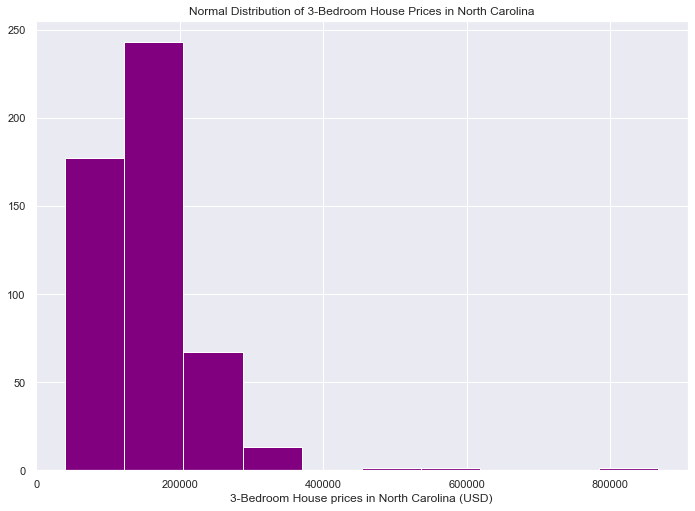

In [46]:
# Check distribution of house prices
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(nc_3bdr_final['avg_house_price'], bins=10, color="purple")
plt.xlabel("3-Bedroom House prices in North Carolina (USD)")
plt.title("Normal Distribution of 3-Bedroom House Prices in North Carolina")

plt.savefig('./static/images/PriceDistribution_3bdr.png')
plt.show()

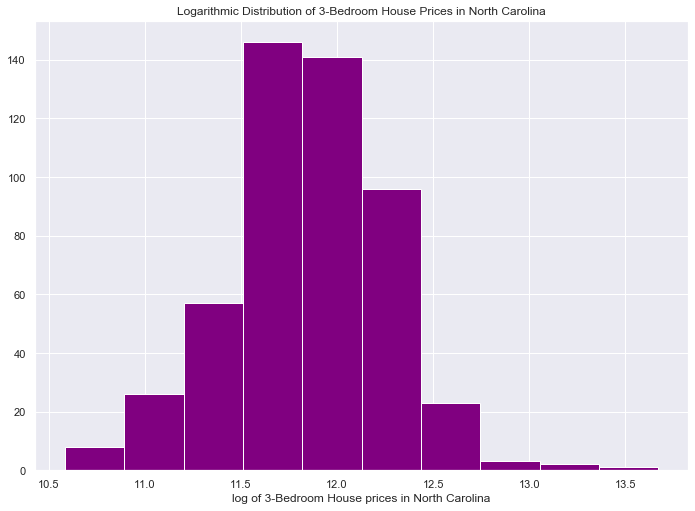

In [47]:
#Take logarithm of the target variable to normalize the distribution & make it more symmetrical
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(np.log(nc_3bdr_final['avg_house_price']), bins=10, color="purple")
plt.xlabel("log of 3-Bedroom House prices in North Carolina")
plt.title("Logarithmic Distribution of 3-Bedroom House Prices in North Carolina")
plt.savefig('./static/images/LogPriceDistribution_3bdr.png')
plt.show()

In [48]:
# Calculate measures:
print(f"Skew (Normal Distribution (3BDR)) is:", nc_3bdr_final['avg_house_price'].skew())
print(f"Kurtosis (Normal Distribution (3BDR)): %f" % nc_3bdr_final['avg_house_price'].kurt())

print(f"Skew (Logarithmic Distribution (3BDR)) is:", np.log(nc_3bdr_final['avg_house_price']).skew())
print(f"Kurtosis (Logarithmic Distribution (3BDR)): %f" % np.log(nc_3bdr_final['avg_house_price']).kurt())

Skew (Normal Distribution (3BDR)) is: 3.2395320266113146
Kurtosis (Normal Distribution (3BDR)): 24.350951
Skew (Logarithmic Distribution (3BDR)) is: 0.05504499804201913
Kurtosis (Logarithmic Distribution (3BDR)): 1.004372


In [49]:
#Creating new df to store log values of house Price
nc_3bdr_log = nc_3bdr_final
nc_3bdr_log.avg_house_price = np.log(nc_3bdr_log.avg_house_price)
nc_3bdr_log

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,11.934203,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,12.223496,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,11.628089,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,11.833164,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,12.281766,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
498,Wrightsville Beach,28480,13.672892,1,2536.0,216.0,83417.0,8.517350
499,Yadkinville,27055,11.718608,4,14131.0,1855.0,44574.0,13.127167
500,Youngsville,27596,12.016289,3,18359.0,1624.0,70535.0,8.845798
501,Zebulon,27597,11.904856,5,23538.0,2995.0,58514.0,12.724106


In [50]:
# Created a df without price to check coorelation among features
nc_3bdr_log_explore = nc_3bdr_log[["city","zipcode", "number_of_schools", "population", "poverty_count", "median_household_income", "poverty_rate"]]
nc_3bdr_log_explore

,city,zipcode,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...
498,Wrightsville Beach,28480,1,2536.0,216.0,83417.0,8.517350
499,Yadkinville,27055,4,14131.0,1855.0,44574.0,13.127167
500,Youngsville,27596,3,18359.0,1624.0,70535.0,8.845798
501,Zebulon,27597,5,23538.0,2995.0,58514.0,12.724106


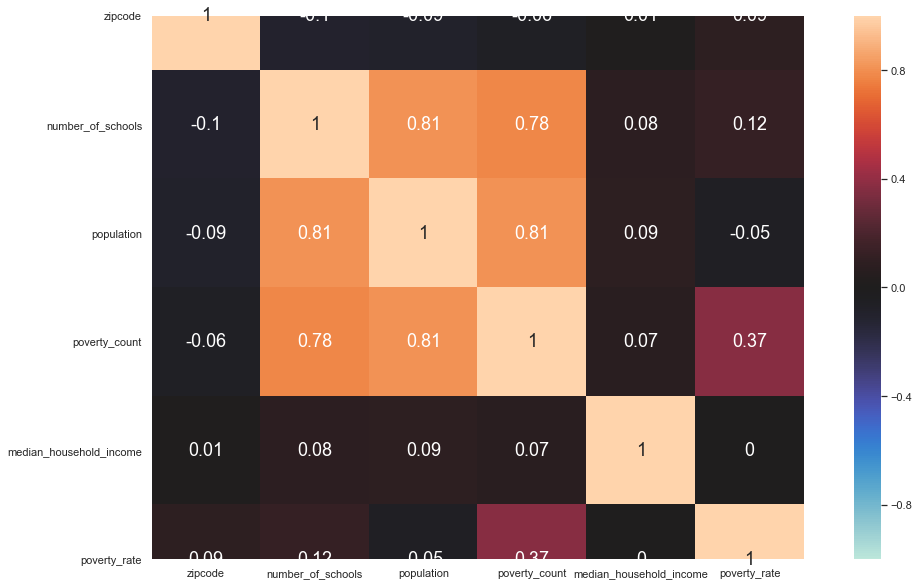

In [51]:
#check coorelation among features using seaborn library
nc_3bdr_log_corr_matrix = nc_3bdr_log_explore.corr().round(2)

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(data=nc_3bdr_log_corr_matrix, 
            annot=True, 
            annot_kws={"size": 18},
            vmin=-1, vmax=1, center= 0, 
            square=True,
            ax=ax,)

# Save Plot
plt.savefig('./static/images/LogCorrelation Matrix_3bdr.png')

# The correlation coefficient ranges from -1 to 1. 
# If the value is close to 1, the variables have a strong positive correlation  
# When it is close to -1, the variables have a strong negative correlation

In [52]:
# OneHot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ["city", "zipcode"]
for i in var_mod:
    nc_3bdr_log[i] = le.fit_transform(nc_3bdr_log[i])
#Dummy Variables:
nc_3bdr_log_final = pd.get_dummies(nc_3bdr_log, columns = var_mod)
nc_3bdr_log_final

,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate,city_0,city_1,city_2,city_3,...,zipcode_493,zipcode_494,zipcode_495,zipcode_496,zipcode_497,zipcode_498,zipcode_499,zipcode_500,zipcode_501,zipcode_502
0,11.934203,4,13700.0,2826.0,51725.0,20.627737,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.223496,2,14555.0,932.0,78095.0,6.403298,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.628089,8,26601.0,5208.0,45121.0,19.578211,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11.833164,5,21299.0,2601.0,56338.0,12.211841,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12.281766,7,40280.0,2248.0,110513.0,5.580933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,13.672892,1,2536.0,216.0,83417.0,8.517350,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,11.718608,4,14131.0,1855.0,44574.0,13.127167,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,12.016289,3,18359.0,1624.0,70535.0,8.845798,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,11.904856,5,23538.0,2995.0,58514.0,12.724106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Define dependent and independent variables
X_3bdr = nc_3bdr_log_final.drop('avg_house_price', axis = 1) # Drop unnecessary columns
y_3bdr = nc_3bdr_log_final["avg_house_price"].values.reshape(-1,1)

In [54]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_3bdr, X_test_3bdr, y_train_3bdr, y_test_3bdr = train_test_split(X_3bdr, y_3bdr, random_state=42)

In [55]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_3bdr = LinearRegression()

In [56]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_3bdr.fit(X_train_3bdr, y_train_3bdr)
training_score_3bdr = model_3bdr.score(X_train_3bdr, y_train_3bdr)
testing_score_3bdr = model_3bdr.score(X_test_3bdr, y_test_3bdr)

# Print Scores
print(f"3 BDR Training Score: {training_score_3bdr}")
print(f"3 BDR Testing Score: {testing_score_3bdr}")

3 BDR Training Score: 0.9999999999999997
3 BDR Testing Score: 0.3564075436947838


3 BDR Mean Squared Error (MSE): 0.13232471407031465
3 BDR R-squared (R2 ): 0.3564075436947838


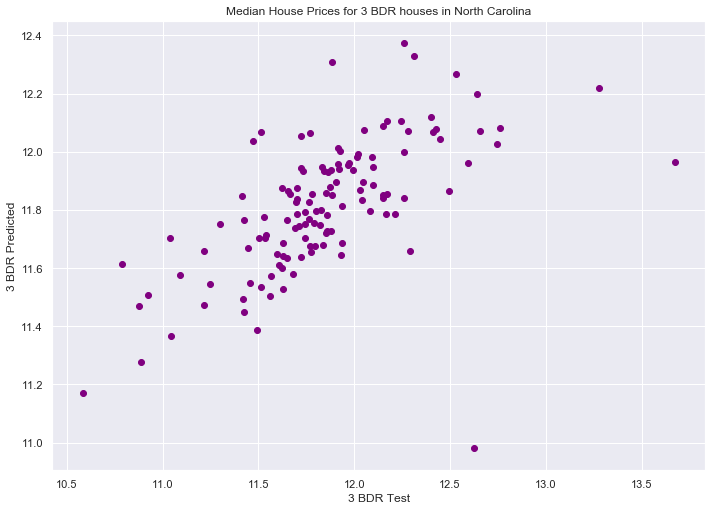

In [57]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_3bdr = model_3bdr.predict(X_test_3bdr)

# Score the predictions with mse and r2
mse_3bdr = mean_squared_error(y_test_3bdr, predicted_3bdr)
r2_3bdr = r2_score(y_test_3bdr, predicted_3bdr)
print(f"3 BDR Mean Squared Error (MSE): {mse_3bdr}")
print(f"3 BDR R-squared (R2 ): {r2_3bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_3bdr,predicted_3bdr, c="purple")

# Label plot
plt.xlabel('3 BDR Test')
plt.ylabel('3 BDR Predicted')

plt.title('Median House Prices for 3 BDR houses in North Carolina')

# Save Plot
plt.savefig('./static/images/LogLinearRegression_3bdr.png')

# Show plot
plt.show()

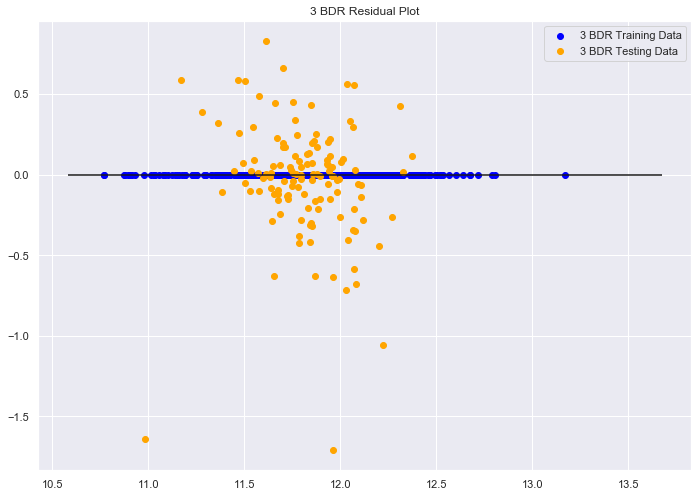

In [58]:
plt.scatter(model_3bdr.predict(X_train_3bdr), model_3bdr.predict(X_train_3bdr) - y_train_3bdr, c="blue", label="3 BDR Training Data")

plt.scatter(model_3bdr.predict(X_test_3bdr), model_3bdr.predict(X_test_3bdr) - y_test_3bdr, c="orange", label="3 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y_3bdr.min(), xmax=y_3bdr.max())

plt.title("3 BDR Residual Plot")
plt.savefig('./static/images/LogResidual Plot_3bdr.png')